<a href="https://colab.research.google.com/github/Rehima1/SMS-Spam-Classification/blob/main/spam_ham_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [130]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
#Importing all the libraries to be used
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB

In [131]:
data = pd.read_csv('spam.csv', encoding='ISO-8859-1')


In [132]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [133]:
data=data.iloc[:,[0,1]]
data.head(10)
data.columns = ['Spam or Ham','Text']
data.head()

,Spam or Ham,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [134]:
data.describe()

,Spam or Ham,Text
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [135]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Spam or Ham  5572 non-null   object
 1   Text         5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


**EDA**

<ipython-input-136-d95d86d611e0>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = data['Spam or Ham'], palette = 'Set3')


<function matplotlib.pyplot.show(close=None, block=None)>

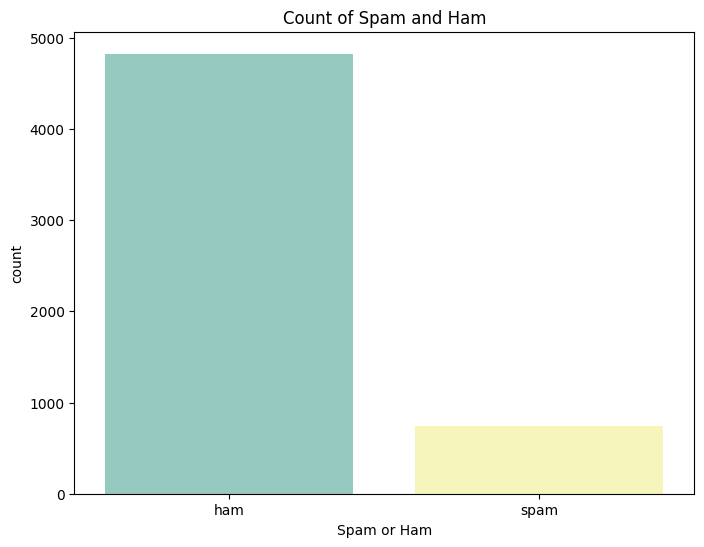

In [136]:
plt.figure(figsize= (8,6))
sns.countplot(x = data['Spam or Ham'], palette = 'Set3')
plt.title('Count of Spam and Ham')
plt.xlabel('Spam or Ham')
plt.ylabel('count')
plt.show

<ipython-input-137-0b36b9837cfd>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Spam or Ham', y='Text_len', data=average_length, palette= 'Set1', edgecolor='black')


<function matplotlib.pyplot.show(close=None, block=None)>

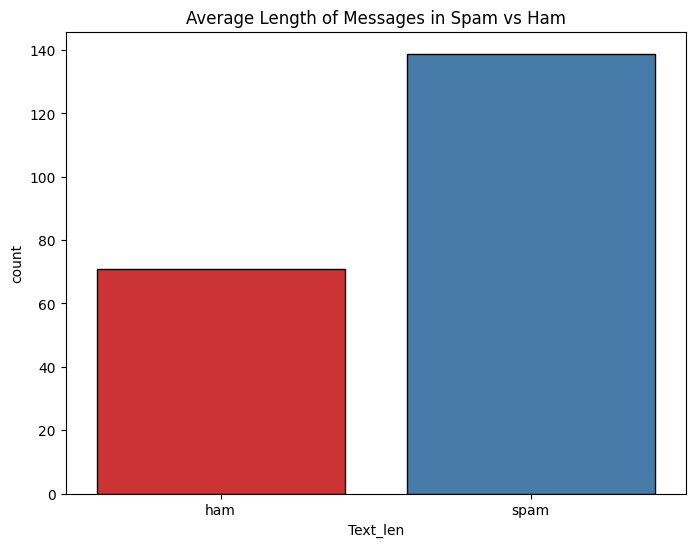

In [137]:
data['Text_len'] = data['Text'].apply(len)
average_length = data.groupby('Spam or Ham')['Text_len'].mean().reset_index()

plt.figure(figsize = (8,6))
sns.barplot(x='Spam or Ham', y='Text_len', data=average_length, palette= 'Set1', edgecolor='black')
plt.title('Average Length of Messages in Spam vs Ham')
plt.xlabel('Text_len')
plt.ylabel('count')
plt.show

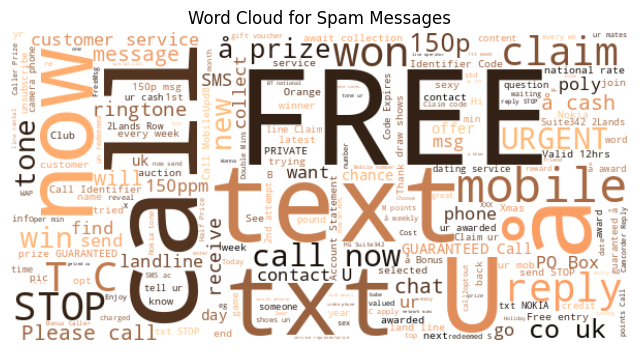

In [138]:
from wordcloud import WordCloud

spam_texts = ' '.join(data[data['Spam or Ham'] == 'spam']['Text'])

plt.figure(figsize=(8, 6))
wordcloud = WordCloud(width=600, height=300, background_color='white', colormap='copper').generate(spam_texts)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Spam Messages')
plt.show()


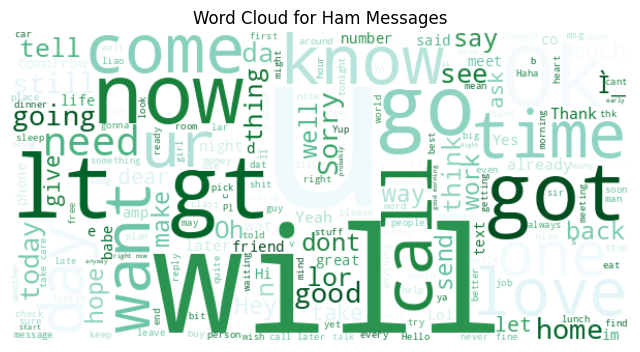

In [139]:
ham_texts = ' '.join(data[data['Spam or Ham'] == 'ham']['Text'])


plt.figure(figsize=(8, 6))
wordcloud = WordCloud(width=600, height=300, background_color='white', colormap='BuGn').generate(ham_texts)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Ham Messages')
plt.show()

<ipython-input-140-5cc3bde8526e>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Word', data=word_freq_data, palette='Set3')


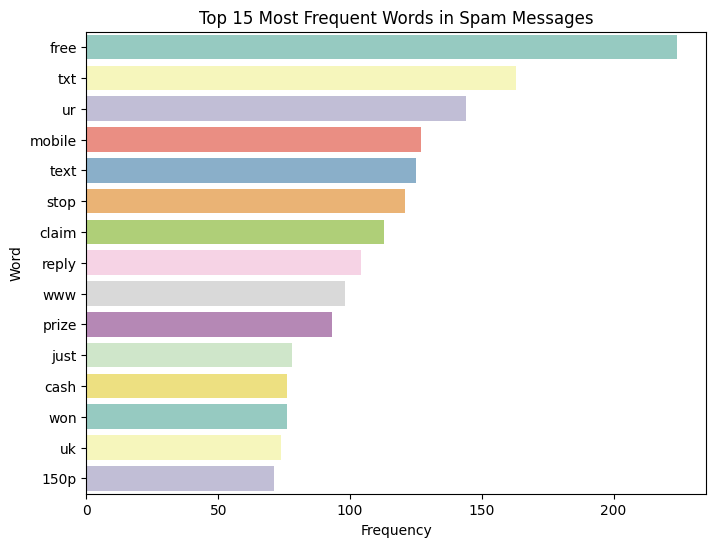

In [140]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer

spam_texts = data[data['Spam or Ham'] == 'spam']['Text']
vectorizer = CountVectorizer(stop_words = 'english')
X = vectorizer.fit_transform(spam_texts)
word_freq = X.sum(axis=0).A1
words = vectorizer.get_feature_names_out()
word_freq_data = pd.DataFrame({'Word': words, 'Frequency': word_freq})
word_freq_data = word_freq_data.sort_values(by = 'Frequency', ascending=False).head(15)


#plotting
plt.figure(figsize=(8, 6))
sns.barplot(x='Frequency', y='Word', data=word_freq_data, palette='Set3')
plt.title('Top 15 Most Frequent Words in Spam Messages')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.show()

<ipython-input-141-d6d1b705abcf>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Word', data=word_freq_data, palette='Set2')


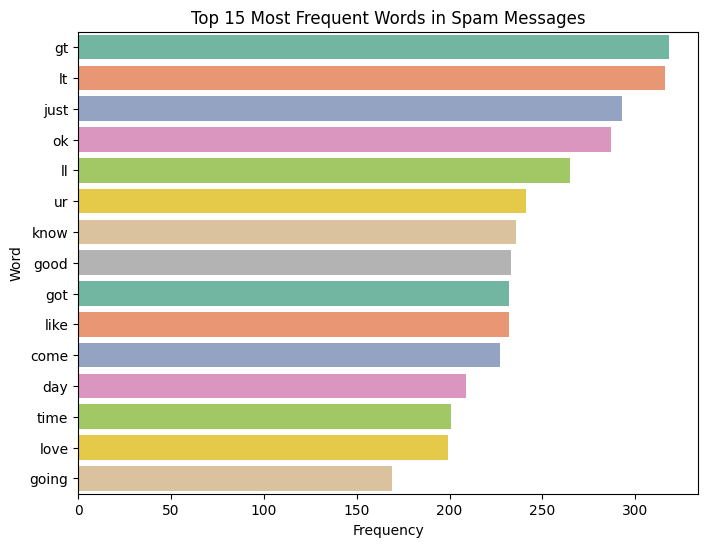

In [141]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer

ham_texts = data[data['Spam or Ham'] == 'ham']['Text']
vectorizer = CountVectorizer(stop_words = 'english')
X = vectorizer.fit_transform(ham_texts)
word_freq = X.sum(axis=0).A1
words = vectorizer.get_feature_names_out()
word_freq_data = pd.DataFrame({'Word': words, 'Frequency': word_freq})
word_freq_data = word_freq_data.sort_values(by = 'Frequency', ascending=False).head(15)


#plotting
plt.figure(figsize=(8, 6))
sns.barplot(x='Frequency', y='Word', data=word_freq_data, palette='Set2')
plt.title('Top 15 Most Frequent Words in Spam Messages')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.show()

Model Building


In [142]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [143]:
data['Spam or Ham'] = data['Spam or Ham'].map({'ham': 0, 'spam': 1})


In [144]:
X = data['Text']
y = data['Spam or Ham']

In [145]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [146]:
vectorizer = TfidfVectorizer(max_features=3000)

X_train_tfidf = vectorizer.fit_transform(X_train)

X_test_tfidf = vectorizer.transform(X_test)

In [147]:
models = {
    "Logistic Regression": LogisticRegression(),
    "SVC": SVC(),
    "Multinomial NB": MultinomialNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier()
}

accuracy_scores = []

for model_name, model in models.items():
    model.fit(X_train_tfidf, y_train)

    y_pred = model.predict(X_test_tfidf)

    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append((model_name, accuracy))


In [148]:
print(accuracy_data)


                 Model  Accuracy
0  Logistic Regression  0.968610
1                  SVC  0.980269
2       Multinomial NB  0.973991
3        Decision Tree  0.975785
4                  KNN  0.921973
5        Random Forest  0.980269


<ipython-input-149-3edc96c4fd67>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Accuracy', y='Model', data=accuracy_data, palette='viridis')


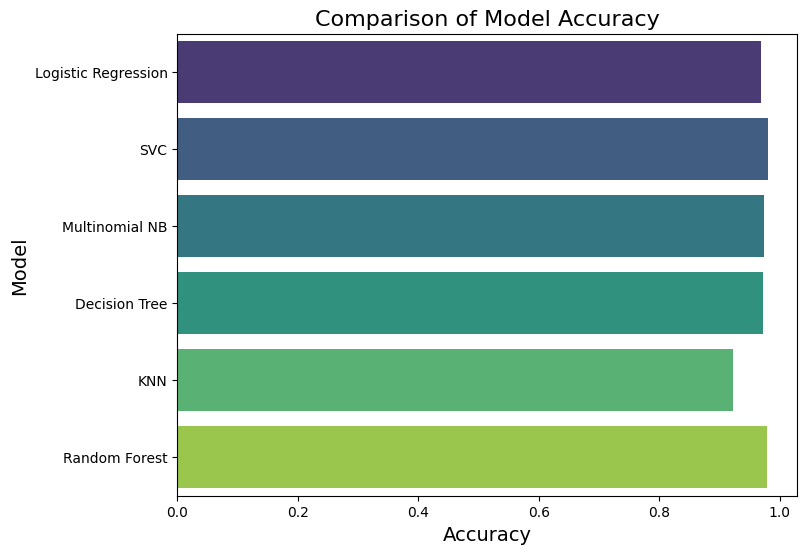

In [149]:
accuracy_data = pd.DataFrame(accuracy_scores, columns=['Model', 'Accuracy'])

# Plot the accuracy scores
plt.figure(figsize=(8, 6))
sns.barplot(x='Accuracy', y='Model', data=accuracy_data, palette='viridis')
plt.title('Comparison of Model Accuracy', fontsize=16)
plt.xlabel('Accuracy', fontsize=14)
plt.ylabel('Model', fontsize=14)
plt.show()